In [87]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import plotly.graph_objs as go
# from plotly.offline import init_notebook_mode,iplot,plot
# init_notebook_mode(connected=True) 

# File to Load 
file_to_load = 'Data Sets/Latest Netflix data with 26+ joined attributes/netflix-rotten-tomatoes-metacritic-imdb.csv'
netflix_metacritic = pd.read_csv(file_to_load)

# File to Load 
file_to_load_h = 'Data Sets/World Happiness Report/world-happiness-report-2021.csv'
world_happiness_report = pd.read_csv(file_to_load_h)

world_happiness_report.head()
world_happiness_report_sub = world_happiness_report[['Country name','Regional indicator','Ladder score']]
world_happiness_report_sub.columns = ['Country','Region','Ladder Score']
world_happiness_report_sub

,Country,Region,Ladder Score
0,Finland,Western Europe,7.842
1,Denmark,Western Europe,7.620
2,Switzerland,Western Europe,7.571
3,Iceland,Western Europe,7.554
4,Netherlands,Western Europe,7.464
...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512
145,Botswana,Sub-Saharan Africa,3.467
146,Rwanda,Sub-Saharan Africa,3.415
147,Zimbabwe,Sub-Saharan Africa,3.145


In [88]:
netflix_metacritic.head()
netflix_metacritic_subset = netflix_metacritic[['Title','Genre','Languages','Country Availability','Director', 'Series or Movie']]
netflix_metacritic_subset.columns = ['Title','Genre','Languages','Country','Director','Series or Movie']

netflix_country_split = netflix_metacritic_subset.Country.str.split(',')
series = netflix_country_split.apply(pd.Series, 1)
stacked = series.stack()
drop = stacked.index = stacked.index.droplevel(-1)
df = pd.DataFrame(stacked)
df = df.join(netflix_metacritic_subset)
del df['Country']
df.columns = ['Country','Title','Genre','Languages','Director','Media Type']
df = df.reset_index(drop=True)
df.to_csv('Data Sets/G3_Netflix_by_Country.csv', index = False)
df

,Country,Title,Genre,Languages,Director,Media Type
0,Thailand,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Swedish, Spanish",Tomas Alfredson,Series
1,Canada,HOW TO BUILD A GIRL,Comedy,English,Coky Giedroyc,Movie
2,Canada,Centigrade,"Drama, Thriller",English,Brendan Walsh,Movie
3,Belgium,ANNE+,Drama,Turkish,NaN,Series
4,Netherlands,ANNE+,Drama,Turkish,NaN,Series
...,...,...,...,...,...,...
195580,Brazil,DreamWorks Kung Fu Panda Awesome Secrets,"Animation, Action, Comedy, Family",English,NaN,Series
195581,Netherlands,DreamWorks Kung Fu Panda Awesome Secrets,"Animation, Action, Comedy, Family",English,NaN,Series
195582,Italy,DreamWorks Kung Fu Panda Awesome Secrets,"Animation, Action, Comedy, Family",English,NaN,Series
195583,Israel,DreamWorks Kung Fu Panda Awesome Secrets,"Animation, Action, Comedy, Family",English,NaN,Series


In [89]:
media_bycountry = df.groupby(['Country','Media Type'])['Title'].nunique()
media_bycountry = pd.DataFrame(media_bycountry)
media_bycountry = media_bycountry.reset_index()
media_bycountry

,Country,Media Type,Title
0,Argentina,Movie,3356
1,Argentina,Series,1754
2,Australia,Movie,3721
3,Australia,Series,2066
4,Belgium,Movie,3580
...,...,...,...
67,Turkey,Series,1737
68,United Kingdom,Movie,4102
69,United Kingdom,Series,2171
70,United States,Movie,3633


In [90]:
happynetflix_merge = pd.merge(media_bycountry, world_happiness_report_sub, on='Country',how='inner')
happynetflix_merge.columns = ['Country','Media Type','Media Count','Region','Happiness Score']
happynetflix_merge = happynetflix_merge[['Region','Country','Happiness Score','Media Type','Media Count']]
happynetflix_merge

,Region,Country,Happiness Score,Media Type,Media Count
0,Latin America and Caribbean,Argentina,5.929,Movie,3356
1,Latin America and Caribbean,Argentina,5.929,Series,1754
2,North America and ANZ,Australia,7.183,Movie,3721
3,North America and ANZ,Australia,7.183,Series,2066
4,Western Europe,Belgium,6.834,Movie,3580
...,...,...,...,...,...
65,Middle East and North Africa,Turkey,4.948,Series,1737
66,Western Europe,United Kingdom,7.064,Movie,4102
67,Western Europe,United Kingdom,7.064,Series,2171
68,North America and ANZ,United States,6.951,Movie,3633


In [91]:
media_bycountry = happynetflix_merge[['Country','Happiness Score','Media Type','Media Count']]
movies_bycountry = media_bycountry[media_bycountry['Media Type'] == 'Movie']
movies_byhappy = pd.merge(movies_bycountry,world_happiness_report_sub,on=['Country'], how='outer')
movies_byhappy = movies_byhappy.drop('Happiness Score', axis=1)
movies_byhappy.columns = ['Country','Media Type','Media Count','Region','Happiness Score']
movies_byhappy = movies_byhappy.sort_values('Happiness Score', ascending = False)
movies_byhappy

,Country,Media Type,Media Count,Region,Happiness Score
35,Finland,NaN,NaN,Western Europe,7.842
36,Denmark,NaN,NaN,Western Europe,7.620
30,Switzerland,Movie,3511.0,Western Europe,7.571
11,Iceland,Movie,3389.0,Western Europe,7.554
19,Netherlands,Movie,3243.0,Western Europe,7.464
...,...,...,...,...,...
144,Lesotho,NaN,NaN,Sub-Saharan Africa,3.512
145,Botswana,NaN,NaN,Sub-Saharan Africa,3.467
146,Rwanda,NaN,NaN,Sub-Saharan Africa,3.415
147,Zimbabwe,NaN,NaN,Sub-Saharan Africa,3.145


Text(0.5, 0, 'Happiness Score')

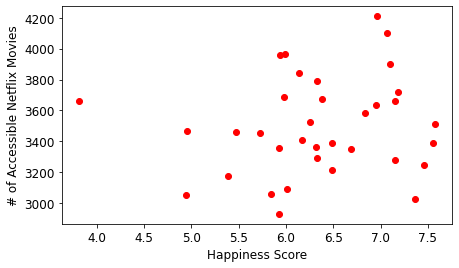

In [92]:
y_values = movies_byhappy['Media Count']
x_values = movies_byhappy['Happiness Score']
colors = {'Western Europe': 'blue', 'North America and ANZ': 'red',
       'Middle East and North Africa': 'gold', 'Latin America and Caribbean': 'green',
       'Central and Eastern Europe':'lightskyblue', 'East Asia':'maroon', 'Southeast Asia':'navy',
       'Commonwealth of Independent States': 'pink', 'Sub-Saharan Africa':'Orange',
       'South Asia':'teal'}

fig = plt.subplots(figsize=(7,4))
plt.rc('font', size=12) 
# color = ['blue', 'red', 'gold', 'green', 'lightskyblue', 'maroon', 'navy', 'pink', 'orange', 'teal']
movie_plot = plt.scatter(x_values,y_values,c='red')
# movie_plot = plt.scatter(x_values,y_values, c=movies_byhappy['Region'].map(colors))

plt.ylabel('# of Accessible Netflix Movies')
plt.xlabel('Happiness Score')


# markers = [movie_plot for color in colors]
# legend = plt.legend(markers,colors.keys(),loc='upper left',title="Region")
# # legend.legendHandles[0].set_color(color[0])
# # legend.legendHandles[1].set_color(color[1])
# # legend.legendHandles[2].set_color(color[2])
# # legend.legendHandles[3].set_color(color[3])
# # legend.legendHandles[4].set_color(color[4])
# # legend.legendHandles[5].set_color(color[5])
# # legend.legendHandles[6].set_color(color[6])
# # legend.legendHandles[7].set_color(color[7])
# # legend.legendHandles[8].set_color(color[8])
# # legend.legendHandles[9].set_color(color[9])

In [93]:
tv_bycountry = media_bycountry[media_bycountry['Media Type'] == 'Series']
tv_byhappy = pd.merge(tv_bycountry,world_happiness_report_sub,on=['Country'], how='outer')
tv_byhappy = tv_byhappy.drop('Happiness Score', axis=1)
tv_byhappy.columns = ['Country','Media Type','Media Count','Region','Happiness Score']
tv_byhappy = tv_byhappy.sort_values('Happiness Score', ascending = False)
tv_byhappy

,Country,Media Type,Media Count,Region,Happiness Score
35,Finland,NaN,NaN,Western Europe,7.842
36,Denmark,NaN,NaN,Western Europe,7.620
30,Switzerland,Series,1932.0,Western Europe,7.571
11,Iceland,Series,1944.0,Western Europe,7.554
19,Netherlands,Series,1753.0,Western Europe,7.464
...,...,...,...,...,...
144,Lesotho,NaN,NaN,Sub-Saharan Africa,3.512
145,Botswana,NaN,NaN,Sub-Saharan Africa,3.467
146,Rwanda,NaN,NaN,Sub-Saharan Africa,3.415
147,Zimbabwe,NaN,NaN,Sub-Saharan Africa,3.145


Text(0.5, 0, 'Happiness Score')

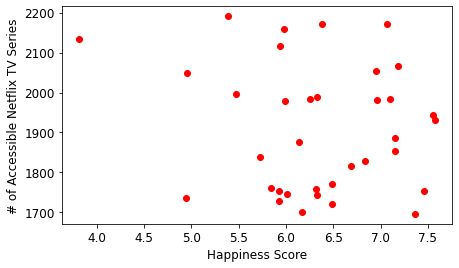

In [94]:
y_values = tv_byhappy['Media Count']
x_values = tv_byhappy['Happiness Score']
# colors = {'Western Europe': 'blue', 'North America and ANZ': 'red',
#        'Middle East and North Africa': 'gold', 'Latin America and Caribbean': 'green',
#        'Central and Eastern Europe':'lightskyblue', 'East Asia':'maroon', 'Southeast Asia':'navy',
#        'Commonwealth of Independent States': 'pink', 'Sub-Saharan Africa':'Orange',
#        'South Asia':'teal'}


fig = plt.subplots(figsize=(7,4))
plt.rc('font', size=12) 
# color = ['blue', 'red', 'gold', 'green', 'lightskyblue', 'maroon', 'navy', 'pink', 'orange', 'teal']
plt.scatter(x_values,y_values, c='red')
# plt.scatter(x_values,y_values, c=movies_byhappy['Region'].map(colors))

plt.ylabel('# of Accessible Netflix TV Series')
plt.xlabel('Happiness Score')

# markers = [movie_plot for color in colors]
# legend = plt.legend(markers,colors.keys(),loc='center left',title="Region")
# legend.legendHandles[0].set_color(color[0])
# legend.legendHandles[1].set_color(color[1])
# legend.legendHandles[2].set_color(color[2])
# legend.legendHandles[3].set_color(color[3])
# legend.legendHandles[4].set_color(color[4])
# legend.legendHandles[5].set_color(color[5])
# legend.legendHandles[6].set_color(color[6])
# legend.legendHandles[7].set_color(color[7])
# legend.legendHandles[8].set_color(color[8])
# legend.legendHandles[9].set_color(color[9])

In [95]:
# media_bycountry = happynetflix_merge[['Country','Happiness Score','Media Type','Media Count']]
# country_values = list(media_bycountry['Country'].unique())
# movie_media = media_bycountry[media_bycountry['Media Type'] =='Movie']
# movie_values = list(movie_media['Media Count'])
# tv_media = media_bycountry[media_bycountry['Media Type'] =='Series']
# tv_values = list(tv_media['Media Count'])

# tv_movies_bycountry = {'Country': country_values,
#                        'Movie Count': movie_values,
#                       'TV Series Count': tv_values}
# tv_movies_df = pd.DataFrame(tv_movies_bycountry)

# tv_movies_df = pd.merge(tv_movies_df, movies_byhappy, on='Country', how='inner')
# del tv_movies_df['Media Count']
# del tv_movies_df['Media Type']
# tv_movies_df = tv_movies_df[['Region','Country','Movie Count','TV Series Count','Happiness Score']]
# tv_movies_df

In [96]:
# y_values = tv_movies_df['TV Series Count']
# x_values = tv_movies_df['Movie Count']
# z_values = tv_movies_df['Happiness Score']

# fig = plt.subplots(figsize=(7,4))
# plt.rc('font', size=12) 
# plt.scatter(x_values,y_values, c=tv_movies_df['Region'].map(colors))

# plt.ylabel('# of Accessible Netflix TV Series')
# plt.xlabel('# of Accessible Netflix Movies')

In [97]:
# all_countries = world_happiness_report_sub[['Region','Country']].copy()
# netflix_access = pd.merge(netflix_countries,all_countries,on=['Region','Country'], how='outer')
# netflix_access = netflix_access.fillna(0)
# netflix_access = netflix_access.drop_duplicates(subset='Country', keep='first')
# netflix_access = netflix_access.reset_index(drop=True)
# netflix_access
# netflix_access.to_csv(r'netflix_access.csv')

In [98]:
# # File to Load 
# file_to_load_two = 'Data Sets/Netflix Subscribers and Revenue by Country/DataNetflixRevenue2020_V2.csv'
# netflix_subscribers_country= pd.read_csv(file_to_load_two)

In [99]:
# netflix_subscribers_country.head()
# netflix_rev_region = netflix_subscribers_country.groupby(['Area','Years']).sum('Subscribers')
# netflix_rev_region

In [100]:
# # File to Load 
# file_to_load_three = 'Data Sets/Netflix Subscribers and Revenue by Country/DataNetflixSubscriber2020_V2.csv'
# netflix_subscribers_revenue = pd.read_csv(file_to_load_three)

In [101]:
# netflix_subscribers_revenue.head()

# netflix_subs_region = netflix_subscribers_revenue.groupby(['Area','Years']).sum('Subscribers')
# netflix_subs_region

In [102]:
# # File to Load 
# file_to_load_four = 'Data Sets/Netflix Subscribers and Revenue by Country/NetflixsRevenue2018toQ2_2020.csv'
# Netflix_revenue_country = pd.read_csv(file_to_load_four)

In [103]:
# Netflix_revenue_country 

In [104]:
# # File to Load 
# file_to_load_five = 'Data Sets/Netflix Subscribers and Revenue by Country/NetflixSubscribersbyCountryfrom2018toQ2_2020.csv'
# netflix_subscribers_country_v = pd.read_csv(file_to_load_five)

In [105]:
# netflix_subscribers_country_v.head()

In [106]:
# # File to Load 
# file_to_load_h = 'Data Sets/World Happiness Report/world-happiness-report-2021.csv'
# world_happiness_report = pd.read_csv(file_to_load_h)

In [107]:
# world_happiness_report.head()
# world_happiness_report_sub = world_happiness_report[['Country name','Regional indicator','Ladder score']]
# world_happiness_report_sub.columns = ['Country','Region','Ladder Score']
# world_happiness_report_sub

In [108]:
# # File to Load 
# file_to_load_r = 'Data Sets/World Happiness Report/world-happiness-report.csv'
# world_happiness_report_t= pd.read_csv(file_to_load_r)

In [109]:
# world_happiness_report_t

In [110]:
# netflix_metacritic.head()
# netflix_metacritic_subset = netflix_metacritic[['Title','Genre','Languages','Country Availability','Director', 'Series or Movie']]
# netflix_metacritic_subset.columns = ['Title','Genre','Languages','Country','Director','Series or Movie']

# netflix_country_split = netflix_metacritic_subset.Country.str.split(',')
# series = netflix_country_split.apply(pd.Series, 1)
# stacked = series.stack()
# drop = stacked.index = stacked.index.droplevel(-1)
# df = pd.DataFrame(stacked)
# df = df.join(netflix_metacritic_subset)
# del df['Country']
# df.columns = ['Country','Title','Genre','Languages','Director','Media Type']
# df = df.reset_index(drop=True)
# netflix_country_stacked = df
# netflix_country_stacked

In [111]:
# netflix_genre_split = netflix_country_stacked.Genre.str.split(',')
# series = netflix_genre_split.apply(pd.Series, 1)
# stacked = series.stack()
# drop = stacked.index = stacked.index.droplevel(-1)
# df2 = pd.DataFrame(stacked)
# df2 = df2.join(df)
# del df2['Genre']
# df2.columns = ['Genre','Country','Title','Languages','Director','Media Type']
# df2 = df2.reset_index(drop=True)
# df2.to_csv('genre_stacked.csv')